# Setup

## Options

Replogle ESS CRISPR:

Essential (Pertpy is larger)

https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_processed_Perturb-seq_datasets/20029387

In [2]:
import crispr as cr 
import pertpy
import muon
import os
import numpy as np
from config import (files_data, label_cell_type_data, gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    label_perturbation_data, key_control_data, 
                    perturbation_type_data, target_genes_data,
                    load_example_data)
# Options
print(dir(cr.ax))
# file = "CRISPRi_scr"
file = "CRISPRi_ess"
# file = "ECCITE"
# file = "augur_ex"
# file = "screen"
# file = "coda"
# file = "perturb-seq"
target_gene_idents = None
target_gene_idents = ["IFNGR2", "STAT1"]
# regress_out = ['total_counts', 'pct_counts_mt']
regress_out = None
process_kws = dict(hvg_kws = dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum = 1e4, max_genes_by_counts = 2500, 
                   max_pct_mt = 5, min_genes = 200, min_cells = 3, scale = 10,
                   regress_out = regress_out)
write_public = True  # if need to download public data, write to examples/data?

#  Set Arguments
label_cell_type = label_cell_type_data[file]
label_perturbation = label_perturbation_data[file]
key_control, perturbation_type, label_target_genes, layer = [
    x[file] for x in [key_control_data, perturbation_type_data, 
                      target_genes_data, layer_perturbation_data]
]
col_gene_symbol = gene_symbols_data[file]
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
print(files_data)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_composition', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': '/home/asline01/projects/crispr/examples/data/filtered_feature_bc_matrix_HH03', 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad', 'coda': '/home/asline01/projects/crispr/examples/data

## Data

### Load

In [3]:
adata = load_example_data(file, col_gene_symbol, 
                          write_public=write_public)  # (down)load h5ad file
print(adata)
adata.obs.head()

/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad


/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad exists.

<<< LOADING FILE /home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad with sc.read()>>>
AnnData object with n_obs × n_vars = 111445 × 33694
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'gui

,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,guide_AHR,guide_ARID1A,guide_ARRDC3,...,guide_TP73,guide_TSC22D1,guide_UBASH3A,guide_UBASH3B,guide_ZBTB1,guide_ZBTB10,guide_ZBTB25,guide_ZC3HAV1,guide_ZNF318,guide_ids
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252,67,18.686567,1,True,2,0,0,0,...,0,0,0,0,0,0,0,0,0,
AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151,104,20.682692,1,True,1,0,0,0,...,0,1,0,0,0,0,0,0,0,TSC22D1
AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037,59,17.576271,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"KLF1,MAP2K6"
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958,39,24.564103,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244,14,17.428571,1,True,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"CEBPE,RUNX1T1"


### Inspect

In [4]:
if label_perturbation is not None:
    print(adata[assay].obs[
        label_perturbation].unique() if assay else adata.obs[
            label_perturbation].unique())
print(adata.layers)
adata[assay].obs.head() if assay else adata.obs.head()

KeyError: nan

### Process

In [6]:
print(process_kws)
adata = cr.pp.process_data(adata, assay=assay, **process_kws)  # process
if assay_protein is not None:  # if includes protein assay
    muon.prot.pp.clr(adata[assay_protein])
print(adata)
adata.obs

{'hvg_kws': {'min_mean': 0.0125, 'max_mean': 3, 'min_disp': 0.5}, 'target_sum': 10000.0, 'max_genes_by_counts': 2500, 'max_pct_mt': 5, 'min_genes': 200, 'min_cells': 3, 'scale': 10, 'regress_out': None}

<<< NORMALIZING >>>

<<< FILTERING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>



AnnData object with n_obs × n_vars = 217400 × 496
    obs: 'library_preparation_protocol', 'condition', 'MOI', 'sgRNA', 'UMI_count', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'protein_names', 'log1p', 'hvg'
    obsm: 'protein_expression'


,library_preparation_protocol,condition,MOI,sgRNA,UMI_count,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
cell_ID,,,,,,,,,,
CELL_1,10X 3' v3 sequencing,Control,1,HLA-B_2,10832.0,809,809,1085.575195,14.298321,1.317119
CELL_2,10X 3' v3 sequencing,Control,2,NaN,10731.0,760,760,1017.642029,15.998880,1.572152
CELL_3,10X 3' v3 sequencing,Control,1,HLA-B_2,28821.0,1196,1196,1226.731689,12.270158,1.000232
CELL_4,10X 3' v3 sequencing,Control,2,NaN,15322.0,908,908,1111.456299,13.922289,1.252617
CELL_5,10X 3' v3 sequencing,Control,0,NaN,10314.0,677,677,962.913818,13.743592,1.427292
...,...,...,...,...,...,...,...,...,...,...
CELL_218327,10X 3' v3 sequencing,Co-culture,4,NaN,12722.0,805,805,1052.286011,14.332987,1.362081
CELL_218328,10X 3' v3 sequencing,Co-culture,2,NaN,11643.0,740,740,997.510559,13.292015,1.332519
CELL_218329,10X 3' v3 sequencing,Co-culture,3,NaN,12497.0,769,769,992.941589,9.824445,0.989428


### Assign Guide RNAs

In [12]:
if "mod" in dir(adata) and "gdo" in adata.mod:  # Guide RNA assignment
    figs_guide_rna = cr.pp.assign_guide_rna(adata, plot=True, 
                                            show_gene_labels=True)

AttributeError: 'AnnData' object has no attribute 'mod'

# Analysis

## UMAP

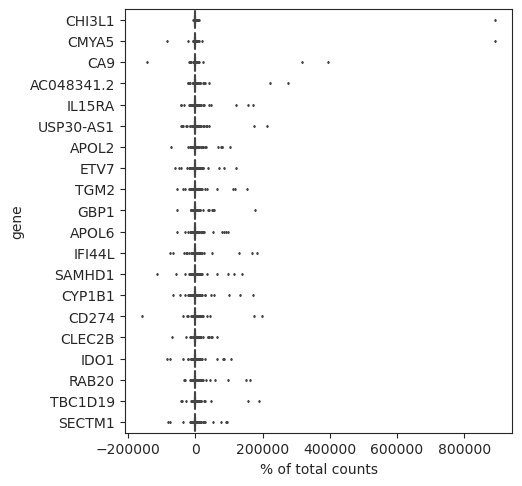



<<< PERFORMING PCA >>>


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING WITH UMAP >>>


<<< CLUSTERING using LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


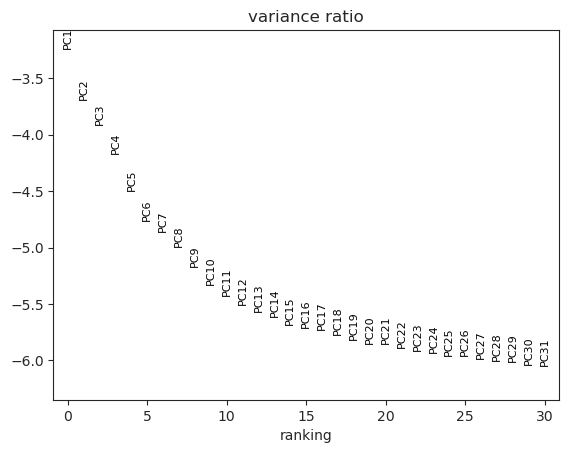

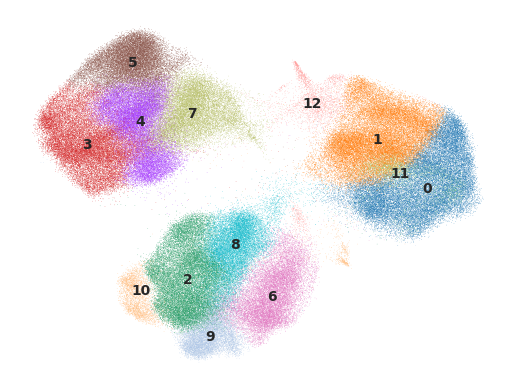

In [8]:
figs_cluster = cr.ax.clustering.cluster(adata, assay=assay, plot=True,
                                        method_cluster="leiden")

## Mixscape

In [11]:
label_target_genes

nan

In [10]:
if assay:
    print("Perturbations:\n" + ", ".join(
        adata[assay].obs[label_perturbation].astype(str).unique()))
else:
    print("Perturbations:\n" + ", ".join(
        adata.obs[label_perturbation].astype(str).unique()))
if layer is not None:  # if want to perform Mixscape
    figs_mix = cr.ax.perform_mixscape(adata, label_perturbation, assay=assay, 
                                      key_control=key_control,
                                      perturbation_type=perturbation_type,
                                      target_gene_idents=target_gene_idents,
                                      label_target_genes=label_target_genes, 
                                      layer=layer, min_de_genes=5,
                                      split_by=None, plot=True)

Perturbations:
Control, IFNγ, Co-culture


KeyError: nan

## Augur

Filtering samples with nan and Control labels.

Output()

cell_ID
CELL_1-1         0
CELL_2-1         0
CELL_3-1         0
CELL_4-1         0
CELL_5-1        12
                ..
CELL_57623-1     1
CELL_57624-1     0
CELL_57625-1     0
CELL_57626-1    11
CELL_57627-1     1
Name: cell_type, Length: 57306, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '8', '10', '11', '12']

cell_ID
CELL_1-1         0
CELL_2-1         0
CELL_3-1         0
CELL_4-1         0
CELL_5-1        12
                ..
CELL_57623-1     1
CELL_57624-1     0
CELL_57625-1     0
CELL_57626-1    11
CELL_57627-1     1
Name: cell_type, Length: 57306, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '8', '10', '11', '12']

cell_ID
CELL_1-1         0
CELL_2-1         0
CELL_3-1         0
CELL_4-1         0
CELL_5-1        12
                ..
CELL_57623-1     1
CELL_57624-1     0
CELL_57625-1     0
CELL_57626-1    11
CELL_57627-1     1
Name: cell_type, Length: 57306, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '8', '10', '11', '12']

cell_ID
CELL_1-1         0
CELL_2-1         0
CELL_3-1         0
CELL_4-1         0
CELL_5-1        12
                ..
CELL_57623-1     1
CELL_57624-1     0
CELL_57625-1     0
CELL_57626-1    11
CELL_57627-1     1
Name: cell_type, Length: 57306, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '8', '10', '11', '12']

cell_ID
CELL_1-1         0
CELL_2-1         0
CELL_3-1         0
CELL_4-1         0
CELL_5-1        12
                ..
CELL_57623-1     1
CELL_57624-1     0
CELL_57625-1     0
CELL_57626-1    11
CELL_57627-1     1
Name: cell_type, Length: 57306, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '8', '10', '11', '12']

Skipping 7 cell type - 2 samples is less than min_cells 50.

Skipping 2 cell type - 3 samples is less than min_cells 50.

Skipping 8 cell type - 14 samples is less than min_cells 50.

Skipping 3 cell type - 1 samples is less than min_cells 50.

Skipping 6 cell type - 5 samples is less than min_cells 50.

                    0   12    1   11   10
mean_augur_score  NaN  NaN  NaN  NaN  NaN
mean_auc          NaN  NaN  NaN  NaN  NaN
mean_accuracy     1.0  1.0  1.0  1.0  1.0
mean_precision    0.0  0.0  0.0  0.0  0.0
mean_f1           0.0  0.0  0.0  0.0  0.0
mean_recall       0.0  0.0  0.0  0.0  0.0


StopIteration: 

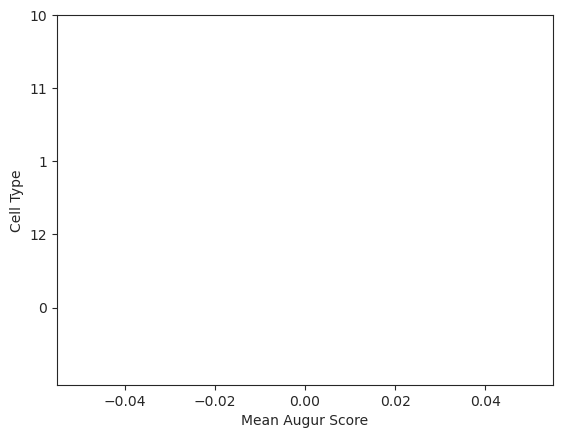

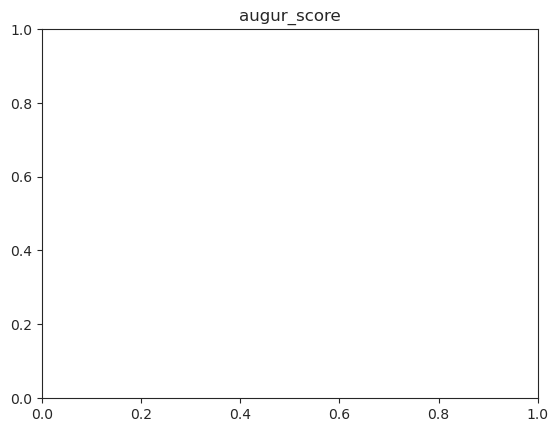

In [13]:
if assay:
    num_conds = len(adata[assay].obs[label_perturbation].astype(str).unique())
else:
    num_conds = len(adata.obs[label_perturbation].astype(str).unique())
d_aug, res_aug, fig_aug = cr.ax.perform_augur(
    adata, assay=assay, label_cell_type=label_cell_type, 
    classifier="random_forest_classifier", augur_mode="velocity", 
    subsample_size=20, select_variance_features=False, 
    seed=1618, n_threads=4, plot=True, 
    label_col=label_perturbation, 
    label_condition=perturbation_type if num_conds > 2 else None,
    treatment=key_control if num_conds > 2 else None)

## SCCoda

### Compositional Analysis

In [49]:
sccoda_data.varm

MuAxisArrays with keys: rna, coda

In [20]:
reference_cell_type = 1
sccoda_out = cr.ax.analyze_composition(
    adata, reference_cell_type, analysis_type="cell_level",
    generate_sample_level=True, label_cell_type="cell_type",
    sample_identifier="batch", modality_key="coda",
    label_condition="condition", est_fdr=0.05, plot=True,
    out_file=None)

AttributeError: module 'crispr.analysis' has no attribute 'analyze_composition'

#### Different Reference Level